#1. Install Dependencies and Setup

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [53]:
gpus=tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [54]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for cpu in gpus:
    tf.config.experimental.set_memory_growth(cpu, True)

In [55]:
tf.config.list_physical_devices('GPU')

[]

#2. Remove dodgy images

In [2]:
import cv2
import imghdr

C:\Users\pande\AppData\Local\Temp\ipykernel_10208\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = 'data'

In [4]:
os.listdir(os.path.join(data_dir,"normal"))

['06eb041ff51e064424ba056806564a_big_gallery.jpg',
 '12874_2022_1578_Fig1_HTML.png',
 '131040.8.jpg',
 '131041.8.jpg',
 '131042.8.jpg',
 '358px-Pneumonia_x-ray.jpg',
 '41597_2023_2229_Fig1_HTML.png',
 '43055_2020_296_Fig11_HTML.png',
 '43055_2020_296_Fig19_HTML.png',
 '43055_2020_296_Fig1_HTML.png',
 '43329424344_ff7f5dff10.jpg',
 '502185e27fd4aadd6f1bcc65dd5738d4ed8da4aaec6e901cf5d07fc62768cdf3_big_gallery.jpeg',
 '5757c0787c96e99ee6f7a3cdb48ed1_big_gallery.jpeg',
 '5ad0cd79-11d0-47b7-840b-123525bbab96.jpg',
 '76052f7902246ff862f52f5d3cd9cd_big_gallery.jpg',
 '7ab085a73b94836516c9d51f5a148c_big_gallery.jpeg',
 '8e8bcfb6342117429b6fe136acbd76_big_gallery.jpeg',
 '90ecc64347f26e18d1d6aabafb1e366bff5f63f1c00f65efcac680fc9ebc9f20_big_gallery.jpeg',
 '997be2d95670821a04f7edf5d2b1bed2.jpg',
 '9fb4addade277cc85a66b2596c6ac87b.jpg',
 'a-Normal-chest-X-ray-showing-the-lungs-clearly-b-Abnormal-CXR-with-high-opacity-where.jpg',
 'a4c5e3114c91597d8fd8905d673a83f7.jpg',
 'am.2016_11_09_14_59_49_30

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
img=cv2.imread(os.path.join('data','normal','7ab085a73b94836516c9d51f5a148c_big_gallery.jpeg'))
img.shape

(620, 630, 3)

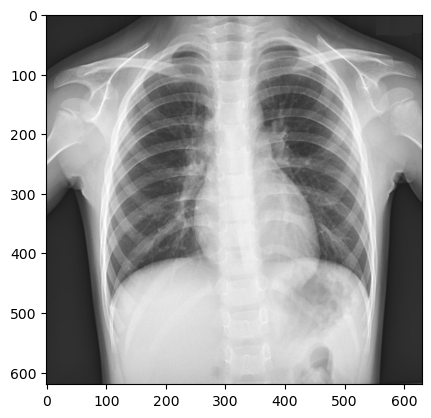

In [9]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BAYER_BG2BGR))
plt.imshow(img)
plt.show()

In [23]:
data = tf.keras.utils.image_dataset_from_directory('data')
#building data pipeline


Found 500 files belonging to 2 classes.


#4. Scale Data

In [87]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [88]:
batch[1]#class1-normal  class0-affected

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

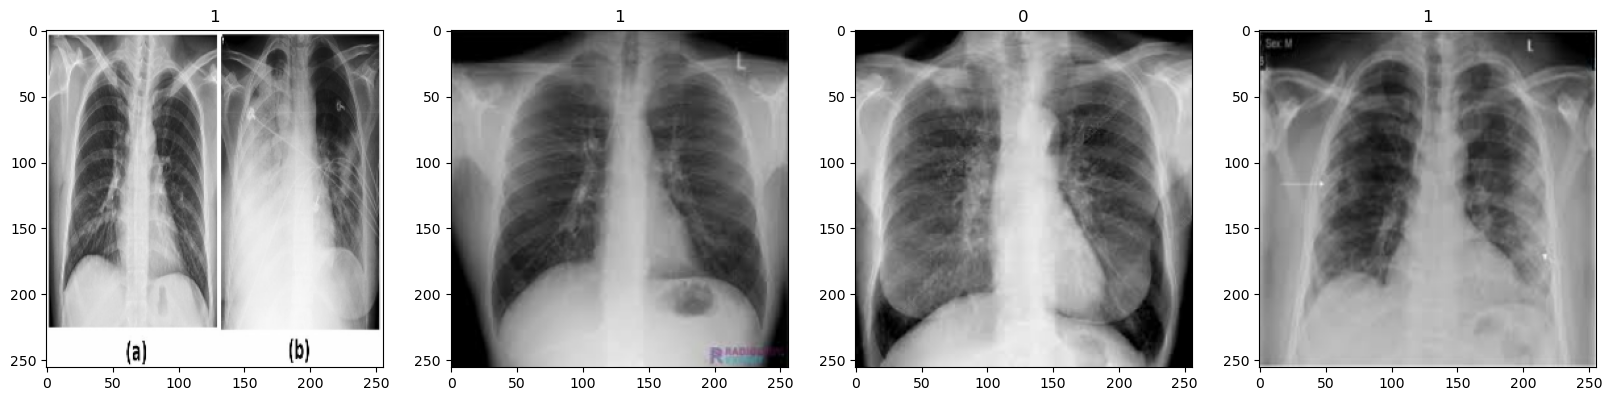

In [89]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [90]:
batch[0].max() #imagee represent as numpyarray

255.0

In [91]:
batch[0].shape

(32, 256, 256, 3)

#5. Split Data

In [92]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.20685922, 0.24073575, 0.25124848],
          [0.6549067 , 0.7091576 , 0.7228754 ],
          [0.7244768 , 0.7658478 , 0.7650825 ],
          ...,
          [0.36495396, 0.41593435, 0.43946376],
          [0.34240848, 0.39731044, 0.40907514],
          [0.29828843, 0.3531904 , 0.35711196]],
 
         [[0.22320773, 0.26634496, 0.2741881 ],
          [0.7043669 , 0.7413526 , 0.74919575],
          [0.7378484 , 0.77723324, 0.78132397],
          ...,
          [0.3452799 , 0.3962603 , 0.4197897 ],
          [0.3162454 , 0.37114736, 0.38291207],
          [0.31028646, 0.3534237 , 0.36126685]],
 
         [[0.20082253, 0.24003823, 0.24788137],
          [0.21129946, 0.25443673, 0.26227987],
          [0.21103342, 0.24307999, 0.25092313],
          ...,
          [0.34963638, 0.40453833, 0.41630304],
          [0.33008578, 0.38498774, 0.3889093 ],
          [0.2812034 , 0.32434064, 0.33218378]],
 
         ...,
 
         [[0.10680147, 0.12248775, 0.1264093 ],
          [0.09401

In [93]:
len(data)

16

In [94]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [95]:
train_size,val_size


(11, 4)

In [96]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#6. Build Deep Learning Model

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [98]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [99]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        

7. Train

In [100]:
logdir='logs'


In [101]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [139]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
11/11 [==============================] - 5s 430ms/step - loss: 0.0877 - accuracy: 0.9744 - val_loss: 0.1454 - val_accuracy: 0.9609
Epoch 2/15
11/11 [==============================] - 5s 433ms/step - loss: 0.0878 - accuracy: 0.9659 - val_loss: 0.0979 - val_accuracy: 0.9766
Epoch 3/15
11/11 [==============================] - 5s 409ms/step - loss: 0.1036 - accuracy: 0.9716 - val_loss: 0.1011 - val_accuracy: 0.9531
Epoch 4/15
11/11 [==============================] - 5s 405ms/step - loss: 0.1041 - accuracy: 0.9716 - val_loss: 0.0845 - val_accuracy: 0.9688
Epoch 5/15
11/11 [==============================] - 5s 433ms/step - loss: 0.0558 - accuracy: 0.9801 - val_loss: 0.0465 - val_accuracy: 0.9844
Epoch 6/15
11/11 [==============================] - 5s 423ms/step - loss: 0.0775 - accuracy: 0.9688 - val_loss: 0.1238 - val_accuracy: 0.9766
Epoch 7/15
11/11 [==============================] - 5s 403ms/step - loss: 0.0779 - accuracy: 0.9801 - val_loss: 0.0373 - val_accuracy: 0.9844
Epoch 

8. Plot Performance

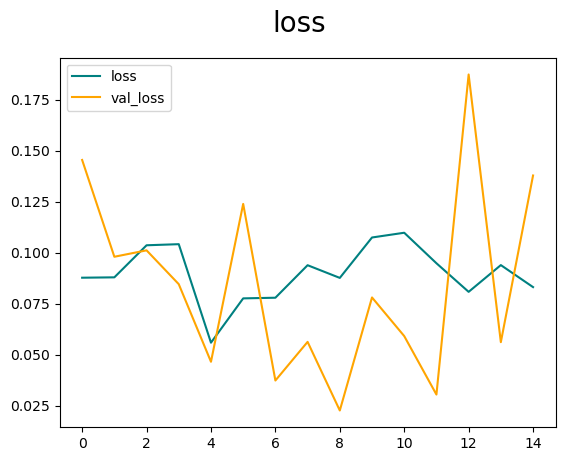

In [140]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle("loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

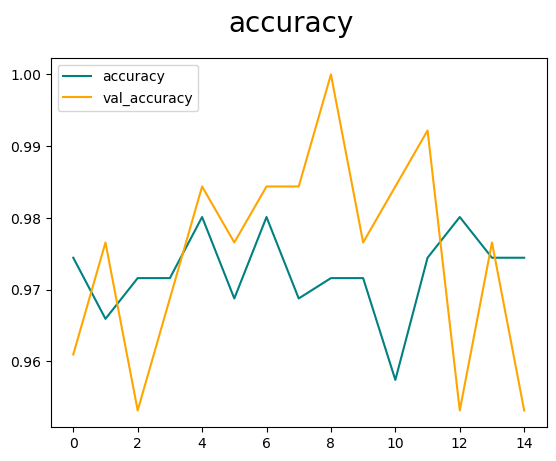

In [141]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle("accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [142]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [143]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [144]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 84ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32) tf.Tensor(0.95, shape=(), dtype=float32)


In [145]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:0.9166666865348816,Accuracy:0.949999988079071


10. Test

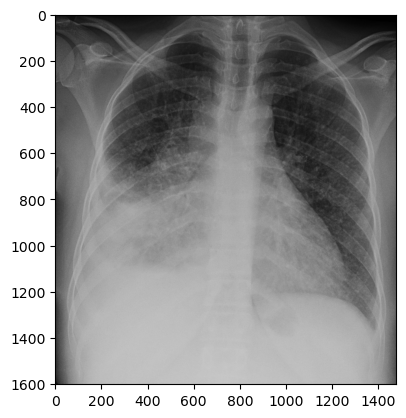

In [162]:
img=cv2.imread('test.jpeg')
plt.imshow(img)
plt.show()

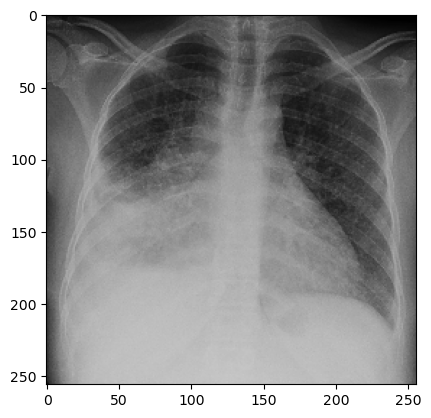

In [163]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [164]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 31ms/step


array([[0.00806491]], dtype=float32)

In [165]:
if yhat < 0.5: 
    print(f'Predicted class is affected')
else:
    print(f'Predicted class is normal')

Predicted class is affected


11. Save the Model

In [166]:
from tensorflow.keras.models import load_model


In [167]:
model.save(os.path.join('models','image_detection.h5'))


C:\Users\pande\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [168]:
new_model = load_model(os.path.join('models','image_detection.h5'))
